# 写在前面
本教程大量参考[子豪兄的教程](https://github.com/TommyZihao/MMSegmentation_Tutorials)，其中部分内容做了适用于个人的修改。
此外，本笔记对部分内容做了注释和笔记，帮助自己更好理解其中内容。

In [1]:
# 确定自己在哪个环境，之前就是内核明明指定了自己新建的conda环境，但是pip安装却安装到了base
# 导致后面清理base环境非常困难，最后自己还是重装miniconda完成的。
%conda list


# packages in environment at /root/miniconda3/envs/mmseg:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main    https://mirrors.ustc.edu.cn/anaconda/pkgs/main
_openmp_mutex             5.1                       1_gnu    https://mirrors.ustc.edu.cn/anaconda/pkgs/main
addict                    2.4.0                    pypi_0    pypi
aiohttp                   3.8.4                    pypi_0    pypi
aiosignal                 1.3.1                    pypi_0    pypi
asttokens                 2.0.5              pyhd3eb1b0_0    https://mirrors.ustc.edu.cn/anaconda/pkgs/main
async-timeout             4.0.2                    pypi_0    pypi
attrs                     23.1.0                   pypi_0    pypi
backcall                  0.2.0              pyhd3eb1b0_0    https://mirrors.ustc.edu.cn/anaconda/pkgs/main
ca-certificates           2023.05.30           h06a4308_0    https://mirrors.ustc.edu.cn/anaconda/pkgs/main
cer

In [2]:
# 再反复确认一下是否安装的是自己新建的环境
%pip install matplotlib

Looking in indexes: https://repo.huaweicloud.com/repository/pypi/simple
  Using cached https://repo.huaweicloud.com/repository/pypi/packages/5d/22/f55638bea4af17edf23e1c919ad5d256141bbeec0196c450be9785f1dcb6/matplotlib-3.7.1-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.2 MB)
  Using cached https://repo.huaweicloud.com/repository/pypi/packages/3c/ef/c5bdaf0394e68cf8f266f4939e6365d9fffbf68899819cc07382525318a0/contourpy-1.0.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (295 kB)
  Using cached https://repo.huaweicloud.com/repository/pypi/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached https://repo.huaweicloud.com/repository/pypi/packages/ad/5f/20da4f41e33e77723b0100ded6539529bd159319ed49d6459a4647cdc7ee/fonttools-4.39.4-py3-none-any.whl (1.0 MB)
  Using cached https://repo.huaweicloud.com/repository/pypi/packages/86/7a/6b438da7534dacd232ed4e19f74f4edced2cda9494d7e6536f54edfdf4a5/

# 环境配置
```
conda create -n mmseg python=3.8

```

In [18]:
# 安装Pytorch
!pip3 install install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio==0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
# 最后这个是源？ 好不好用？

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.11.1+cu113 (from versions: 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.0+cu113, 1.10.1, 1.10.1+cu113, 1.10.2, 1.10.2+cu113, 1.11.0, 1.11.0+cu113, 1.12.0, 1.12.0+cu113, 1.12.1, 1.12.1+cu113, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution found for torch==1.11.1+cu113


In [12]:
# 安装MIM以及相关配置，这些都是OpenMMLab老东西了
!pip install -U openmim
!mim install "mmengine==0.7.1"
!mim install "mmcv==2.0.0rc4"

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu117/torch2.0.0/index.html
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu117/torch2.0.0/index.html


In [6]:
# 再安装其他的，必要的包
!pip install opencv-python pillow matplotlib seaborn tqdm pytorch-lightning "mmdet>=3.0.0rc1" -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/8f/2e/17bbb83fbf102687bb2aa3d808add39da820a7698159302a1a69bb82e01c/seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/e6/02/a2cff6306177ae6bc73bc0665065de51dfb3b9db7373e122e2735faf0d97/tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/19/da/08cc571a5ec162b4df27958d7680448b7a2ec04abd658726872fc016913b/pytorch_lightning-2.0.3-py3-none-any.whl (720 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/2d/6a/1f97b0f476f64ed46dedc6b235ba51a5ef4c32db65702bf04d7a7de4ad51/mmdet-3.0.0-py3-none-any.whl (1.7 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/96/28/026dc037f177d53558477931677b120f649dd5a0dcdc4b44dc38b3d75711/torch-2.0.1-cp38-cp38-manylinux1_x86_64.whl (619.9 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/e3/bd/4c0a4619494188a9db5d77e2100ab

## 下载 MMSegmentation

In [ ]:
# 删掉原有的 mmsegmentation 文件夹（如有）
!rm -rf mmsegmentation

In [ ]:
# 从 github 上下载最新的 mmsegmentation 源代码
!git clone https://ghproxy.com//github.com/open-mmlab/mmsegmentation.git -b dev-1.x
# 后面的尾巴是指定mmseg的版本为1.几版本

In [7]:
# 进入主目录
import os
os.chdir('mmsegmentation')

In [ ]:
!conda env list

## 安装 MMSegmentation

In [8]:
!pip install -v -e .

Using pip 23.1.2 from /root/miniconda3/envs/mmseg/lib/python3.8/site-packages/pip (python 3.8)
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Obtaining file:///root/autodl-tmp/mmseg/mmsegmentation
  Preparing metadata (setup.py) ...   Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-9t0nbjqy/mmsegmentation.egg-info
  writing /tmp/pip-pip-egg-info-9t0nbjqy/mmsegmentation.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-9t0nbjqy/mmsegmentation.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-9t0nbjqy/mmsegmentation.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-9t0nbjqy/mmsegmentation.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-9t0nbjqy/mmsegmentation.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-9t0nbjqy/mmsegmentation.egg-info/SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'LI

## 下载预训练模型权重文件和视频素材
下载预训练模型权重至`checkpoint`目录

模型的路径可以参考：
Model Zoo：https://github.com/open-mmlab/mmsegmentation/blob/master/docs/en/model_zoo.md

下载方法：打开网页之后，找到自己想要的模型，右键复制连接。 \
<img src="way_to_pretrain_model.png">



In [ ]:
# 先创建checkpoint、outputs、data文件夹
import os

# 创建 checkpoint 文件夹，用于存放预训练模型权重文件
os.mkdir('checkpoint')

# 创建 outputs 文件夹，用于存放预测结果
os.mkdir('outputs')

# 创建 data 文件夹，用于存放图片和视频素材
os.mkdir('data')

In [ ]:
# 从 Model Zoo 获取 PSPNet 预训练模型，下载并保存在 checkpoint 文件夹中
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoint


## 下载素材至`data`目录

如果报错`Unable to establish SSL connection.`，重新运行代码块即可。

In [ ]:
# 伦敦街景图片
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_uk.jpeg -P data

# 上海驾车街景视频，视频来源：https://www.youtube.com/watch?v=ll8TgCZ0plk
!wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/detectron2/traffic.mp4 -P data

# 街拍视频，2022年3月30日
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_20220330_174028.mp4 -P data

## 检查安装是否成功

In [2]:
# 检查 Pytorch
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

/root/miniconda3/envs/mmseg/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Pytorch 版本 1.10.1+cu113
CUDA 是否可用 True


In [3]:
# 检查 mmcv
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

MMCV版本 2.0.0rc4
CUDA版本 11.3
编译器版本 GCC 9.3


In [4]:
# 检查 mmsegmentation
import mmseg
from mmseg.utils import register_all_modules
from mmseg.apis import inference_model, init_model
print('mmsegmentation版本', mmseg.__version__)

mmsegmentation版本 1.0.0


## 设置Matplotlib中文字体
对于windows操作系统
```python
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
```
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
```
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib
```

In [5]:
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/root/miniconda3/envs/mmseg/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/root/miniconda3/envs/mmseg/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figur

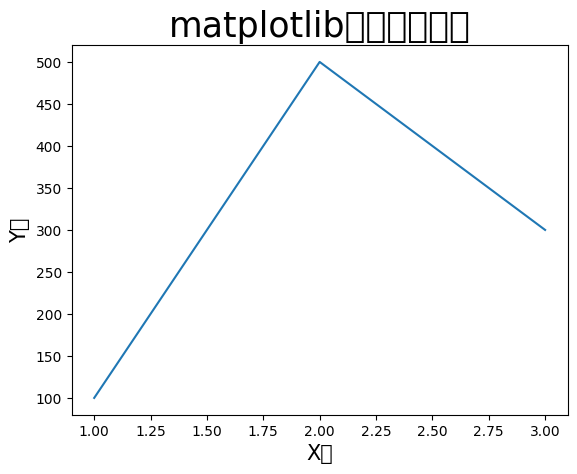

In [6]:
# 测试中文字体
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

# 使用预训练模型对单张图像进行分析
当然也有对视频进行语义分割的内容，详见子豪兄的教程，我的笔记中不再过多展示

In [9]:
import os
os.chdir('mmsegmentation')

## MMSegmentation模型库

Model Zoo：https://github.com/open-mmlab/mmsegmentation/blob/master/docs/en/model_zoo.md

## 常用config和checkpoint文件
### 这里列出三种最常见的：pspnet,segformer,mask2former

configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py

https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth

configs/segformer/segformer_mit-b5_8xb1-160k_cityscapes-1024x1024.py

https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth

configs/mask2former/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024.py

https://download.openmmlab.com/mmsegmentation/v0.5/mask2former/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024_20221202_141901-28ad20f1.pth

## 第一种，命令行启动方式

In [10]:
# segformer为例
# 命令行启动（但是更加推荐api的方式，更快）

!python demo/image_demo.py \
        data/street_uk.jpeg \
        configs/segformer/segformer_mit-b5_8xb1-160k_cityscapes-1024x1024.py \
        https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth \
        --out-file outputs/B1_uk_segformer.jpg \
        --device cuda:0 \
        --opacity 0.5

/root/autodl-tmp/mmseg/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/root/autodl-tmp/mmseg/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth
Downloading: "https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth" to /root/.cac

## 第二种，API启动方式

In [11]:
# 首先，导入需要的工具

import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import mmcv
from mmseg.apis import init_model, inference_model, show_result_pyplot
from mmseg.utils import register_all_modules
register_all_modules()


# 模型 config 配置文件
# config_file = 'configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
config_file = 'configs/mask2former/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024.py'

# 模型 checkpoint 权重文件
# checkpoint_file = 'https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'
checkpoint_file = 'https://download.openmmlab.com/mmsegmentation/v0.5/mask2former/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024_20221202_141901-dc2c2ddd.pth'

# 初始化模型
from mmseg.apis import init_model
model = init_model(config_file, checkpoint_file, device='cuda:0')

# 进行分析
from mmseg.apis import inference_model
from mmengine.model.utils import revert_sync_batchnorm
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)


result = inference_model(model, "data/street_uk.jpeg")



Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/mask2former/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024_20221202_141901-dc2c2ddd.pth


Downloading: "https://download.openmmlab.com/mmsegmentation/v0.5/mask2former/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024_20221202_141901-dc2c2ddd.pth" to /root/.cache/torch/hub/checkpoints/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024_20221202_141901-dc2c2ddd.pth


The model and loaded state dict do not match exactly

unexpected key in source state_dict: decode_head.pixel_decoder.encoder.layers.0.attentions.0.sampling_offsets.weight, decode_head.pixel_decoder.encoder.layers.0.attentions.0.sampling_offsets.bias, decode_head.pixel_decoder.encoder.layers.0.attentions.0.attention_weights.weight, decode_head.pixel_decoder.encoder.layers.0.attentions.0.attention_weights.bias, decode_head.pixel_decoder.encoder.layers.0.attentions.0.value_proj.weight, decode_head.pixel_decoder.encoder.layers.0.attentions.0.value_proj.bias, decode_head.pixel_decoder.encoder.layers.0.attentions.0.output_proj.weight, decode_head.pixel_decoder.encoder.layers.0.attentions.0.output_proj.bias, decode_head.pixel_decoder.encoder.layers.0.ffns.0.layers.0.0.weight, decode_head.pixel_decoder.encoder.layers.0.ffns.0.layers.0.0.bias, decode_head.pixel_decoder.encoder.layers.0.ffns.0.layers.1.weight, decode_head.pixel_decoder.encoder.layers.0.ffns.0.layers.1.bias, decode_head.pixel_dec

/root/miniconda3/envs/mmseg/lib/python3.8/site-packages/mmdet/models/layers/positional_encoding.py:84: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature**(2 * (dim_t // 2) / self.num_feats)
/root/miniconda3/envs/mmseg/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [12]:
# 查看结果
result

<SegDataSample(

    META INFORMATION
    img_shape: (1024, 1536)
    img_padding_size: (0, 0, 0, 0)
    img_path: 'data/street_uk.jpeg'
    pad_shape: torch.Size([1024, 1536])
    ori_shape: (1500, 2250)
    scale_factor: (0.6826666666666666, 0.6826666666666666)

    DATA FIELDS
    pred_sem_seg: <PixelData(
        
            META INFORMATION
        
            DATA FIELDS
            data: tensor([[[2, 2, 2,  ..., 2, 2, 2],
                         [2, 2, 2,  ..., 2, 2, 2],
                         [2, 2, 2,  ..., 2, 2, 2],
                         ...,
                         [2, 2, 2,  ..., 2, 2, 2],
                         [2, 2, 2,  ..., 2, 2, 2],
                         [2, 2, 2,  ..., 2, 2, 2]]], device='cuda:0')
        ) at 0x7f8604207be0>
    seg_logits: <PixelData(
        
            META INFORMATION
        
            DATA FIELDS
            data: tensor([[[9.4943e-08, 9.4943e-08, 9.3540e-08,  ..., 7.3225e-09,
                          7.2333e-09, 7.2333e-09],


In [13]:
# 更精细地查看结果
# pred_sem_seg记录了每个像素的分类
# seg_logits
key = result.keys()
shape1 = result.pred_sem_seg.data.shape
num_of_classes = np.unique(result.pred_sem_seg.data.cpu())
pixel_classes = result.pred_sem_seg.data
pixel_confidence_score = result.seg_logits.data
shape2 = result.seg_logits.data.shape

print("有两种结果数据可以查询：", key)
print("pred_sem_seg的形状大小：", shape1)
print("预测得到的类别数量：", num_of_classes)
print("每个像素的类别：", pixel_classes)
print("每个像素的置信度：", pixel_confidence_score)
print("seg_logits的大小：", shape2)

有两种结果数据可以查询： ['pred_sem_seg', 'seg_logits']
pred_sem_seg的形状大小： torch.Size([1, 1500, 2250])
预测得到的类别数量： [1 2 6 7]
每个像素的类别： tensor([[[2, 2, 2,  ..., 2, 2, 2],
         [2, 2, 2,  ..., 2, 2, 2],
         [2, 2, 2,  ..., 2, 2, 2],
         ...,
         [2, 2, 2,  ..., 2, 2, 2],
         [2, 2, 2,  ..., 2, 2, 2],
         [2, 2, 2,  ..., 2, 2, 2]]], device='cuda:0')
每个像素的置信度： tensor([[[9.4943e-08, 9.4943e-08, 9.3540e-08,  ..., 7.3225e-09,
          7.2333e-09, 7.2333e-09],
         [9.4943e-08, 9.4943e-08, 9.3540e-08,  ..., 7.3225e-09,
          7.2333e-09, 7.2333e-09],
         [9.4497e-08, 9.4497e-08, 9.3346e-08,  ..., 8.8793e-09,
          8.7523e-09, 8.7523e-09],
         ...,
         [4.2407e-11, 4.2407e-11, 4.0982e-11,  ..., 2.2175e-07,
          2.1134e-07, 2.1134e-07],
         [3.8111e-11, 3.8111e-11, 3.6892e-11,  ..., 2.0847e-07,
          1.9894e-07, 1.9894e-07],
         [3.8111e-11, 3.8111e-11, 3.6892e-11,  ..., 2.0847e-07,
          1.9894e-07, 1.9894e-07]],

        [[4.6448

# 可视化语义分割预测结果-方法二
推荐这种，一般论文里面就是放这种

In [15]:
# 导入cityscapes可视化专门的配置文件，这个配置文件是子豪兄配置的
# 如果是别的项目，那么就要换配置文件

from mmseg.datasets import cityscapes
import numpy as np
import mmcv 

# 获取类别名和调色板
classes = cityscapes.CityscapesDataset.METAINFO['classes']
palette = cityscapes.CityscapesDataset.METAINFO['palette']
opacity = 0.15 # 透明度，越大越接近原图

# 将分割图按调色板染色
seg_map = result[0].astype('uint8')
# seg_map = class_map.astype('uint8')
seg_img = Image.fromarray(seg_map).convert('P')
seg_img.putpalette(np.array(palette, dtype=np.uint8))

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
plt.figure(figsize=(14, 8))
im = plt.imshow(((np.array(seg_img.convert('RGB')))*(1-opacity) + mmcv.imread(img_path)*opacity) / 255)

# 为每一种颜色创建一个图例
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(18)]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')

plt.show()

TypeError: 'SegDataSample' object is not subscriptable